<a href="https://colab.research.google.com/github/SaahilMenon/Churn-Data-Analysis-Teleco-/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Analysis (Telco Dataset)

## Business Problem
Customer churn is a major issue for telecom companies as retaining customers is often cheaper than acquiring new ones.  
The goal of this analysis is to understand which factors influence churn and provide data-driven recommendations to improve customer retention.

## Dataset
- 7,032 customer records
- Features: demographics (gender, age, dependents), account information (tenure, contract type, billing method), services used (phone, internet, security), and payment details
- Target variable: `Churn` (1 = customer left, 0 = stayed)

## Objectives
- Clean and prepare the dataset
- Explore churn patterns using descriptive statistics and visualizations
- Identify key drivers of churn
- Provide actionable business recommendations



## Step 1: Data Cleaning
- Handle missing values
- Convert TotalCharges to numeric
- Encode categorical variables


In [2]:
import pandas as pd
df = pd.read_csv("Newdataset.csv")
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [9]:
# Convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

# Confirm changes
print(df['TotalCharges'].isnull().sum())  #we got 0
print(df.shape)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0
(7032, 7062)


In [10]:
# Load original dataset again (fresh copy for BI)
df_bi = pd.read_csv("Newdataset.csv")

# Convert TotalCharges properly
df_bi['TotalCharges'] = pd.to_numeric(df_bi['TotalCharges'], errors='coerce')
df_bi.dropna(subset=['TotalCharges'], inplace=True)

# Export BI-friendly version (no dummy variables)
df_bi.to_csv("cleaned_telco_churn_bi.csv", index=False)

from google.colab import files
files.download("cleaned_telco_churn_bi.csv")

# Confirm
print(df_bi['TotalCharges'].isnull().sum())  # should be 0
print(df_bi.shape)  # should still be ~7032 rows, ~21 cols


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0
(7032, 21)


In [5]:
df = pd.get_dummies(df, drop_first=True)
print(df.isnull().sum().sum())
df.head()
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})
df.head()

0


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [6]:
df.to_csv("cleaned_Teleco_dataset.csv")

## Step 2: Exploratory Data Analysis
- Distribution of churn
- Tenure vs churn
- Charges vs churn
- Contract type, payment method, and demographics


### 1. Churn Distribution
Understanding the distribution of the target variable `Churn` helps identify if the dataset is imbalanced, which can affect model performance.


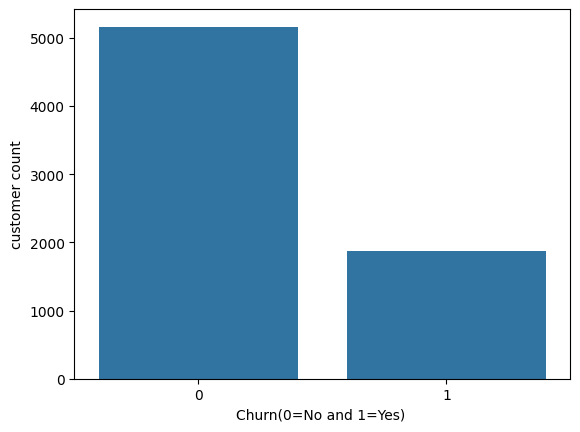

churn Rates: 26.58%


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.countplot(x='Churn', data=df)
plt.xlabel("Churn(0=No and 1=Yes) ")
plt.ylabel("customer count")
plt.show()
print(f"churn Rates: {df['Churn'].mean()*100:.2f}%")

### 2. Tenure vs Churn
Customers with shorter tenure may be more likely to churn. We visualize tenure grouped by churn.


<Axes: xlabel='tenure', ylabel='Count'>

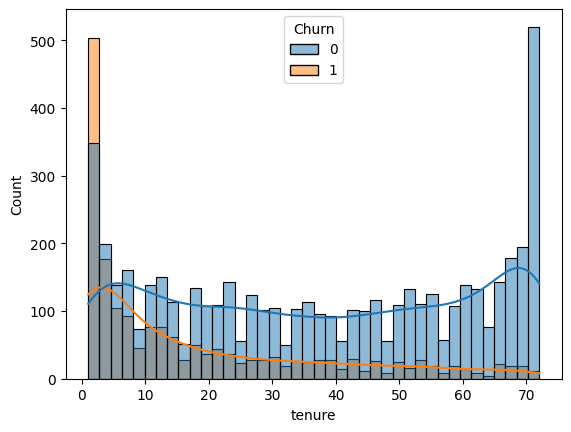

In [ ]:
sns.histplot(data=df, x='tenure', hue='Churn', bins=40, kde=True)


###3. Monthly charges vs Churn

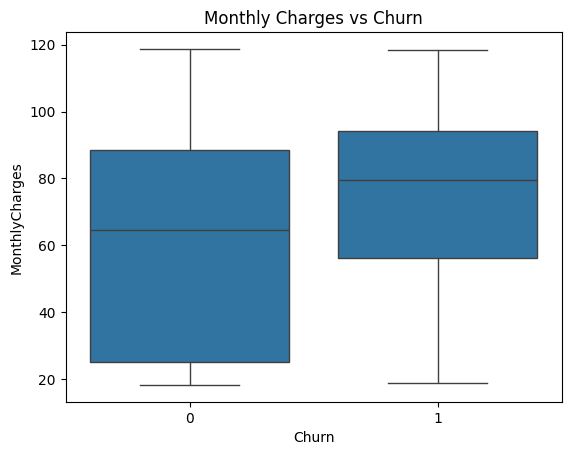

In [ ]:
sns.boxplot(x='Churn', y='MonthlyCharges', data =df )
plt.title('Monthly Charges vs Churn')
plt.show()

As seen from the boxplot we can see that customers that pay higher monthly charges are more likely to churn as churn rates are around median for customers that churn

###4. Total charges Vs Churn

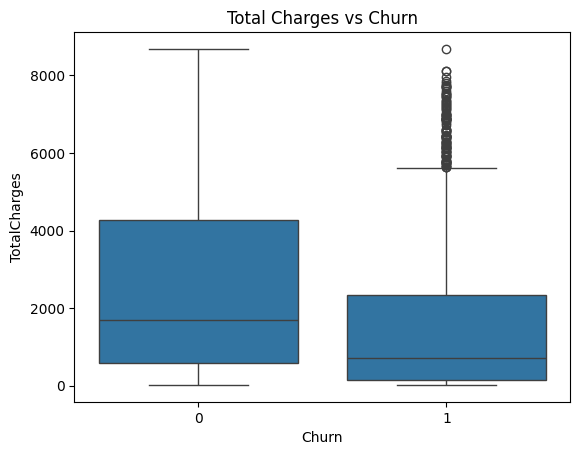

In [ ]:
sns.boxplot(x='Churn', y='TotalCharges', data =df )
plt.title('Total Charges vs Churn')
plt.show()

SHOWS FOLLOWING OBSERVATIONS:
*   Loyal customer accumilated mid range of total charges
*   Customers that churned either left very early or as seen by outliers they had very high total charges




###5. Contract vs churn

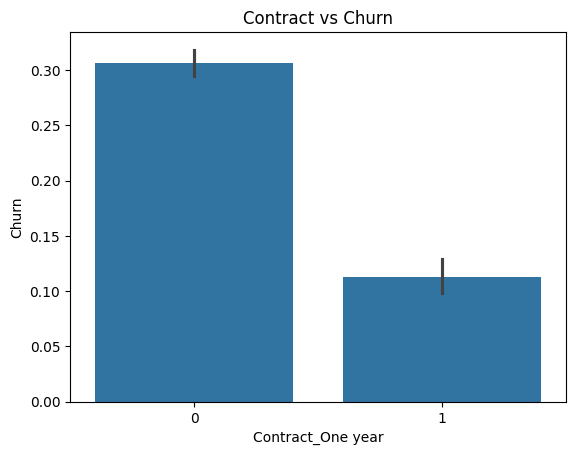

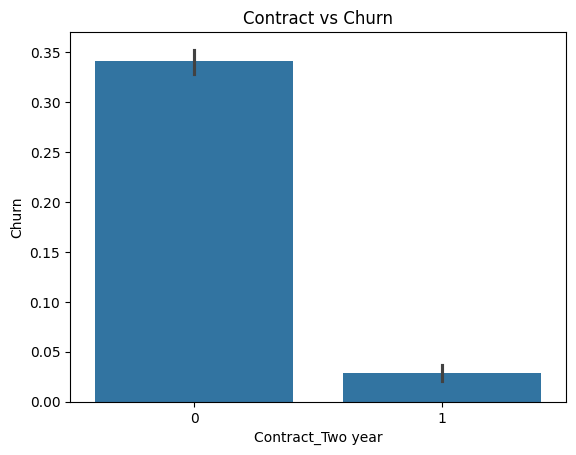

In [ ]:
contract=['Contract_One year',	'Contract_Two year']
for con in contract:
  sns.barplot(x=df[con], y=df['Churn'])
  plt.title("Contract vs Churn")
  plt.show()

Long-term contracts reduce churn.

Customers with two-year contracts are much more loyal or locked in.

Short-term or flexible contracts are a churn risk.

###6. Payment Method vs Churn


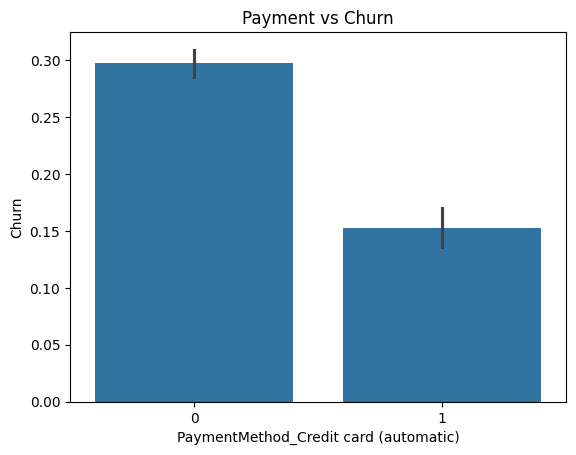

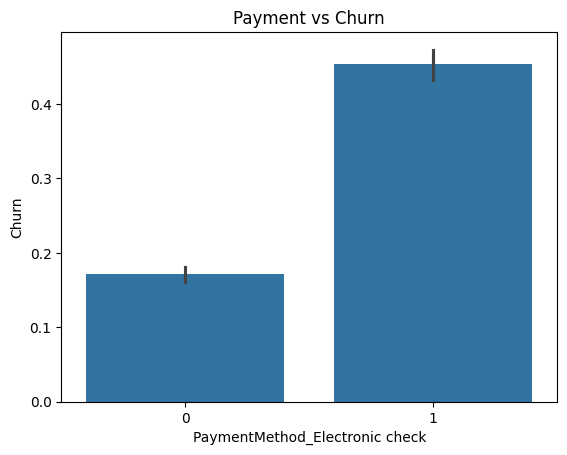

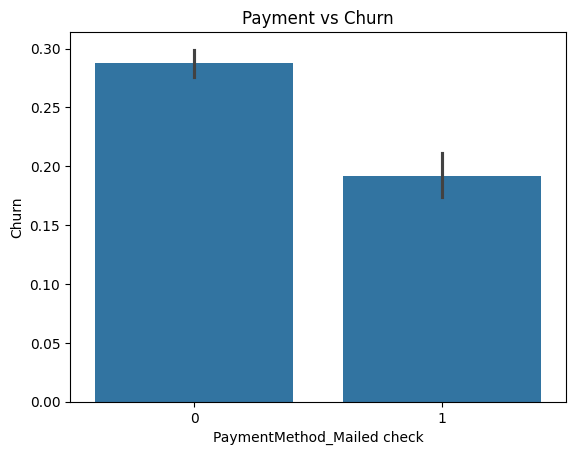

In [ ]:
payment=["PaymentMethod_Credit card (automatic)",	"PaymentMethod_Electronic check",	"PaymentMethod_Mailed check"]
for pay in payment:
  sns.barplot(x=df[pay], y=df['Churn'])
  plt.title("Payment vs Churn")
  plt.show()

Can see that we had highest churn rates when Electronic check was used as payment method and Credit cards had the least churn rates

###7. Catgeorical variables vs Churn

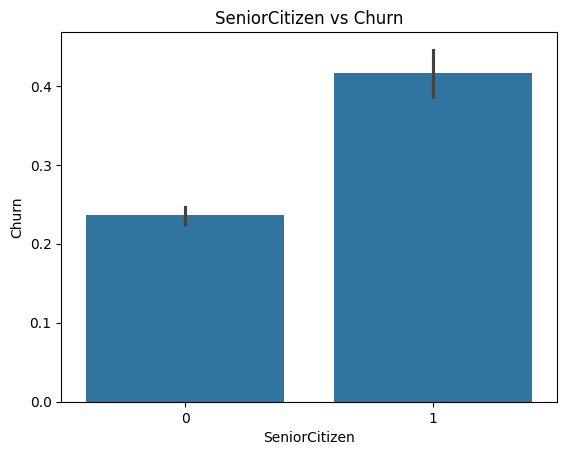

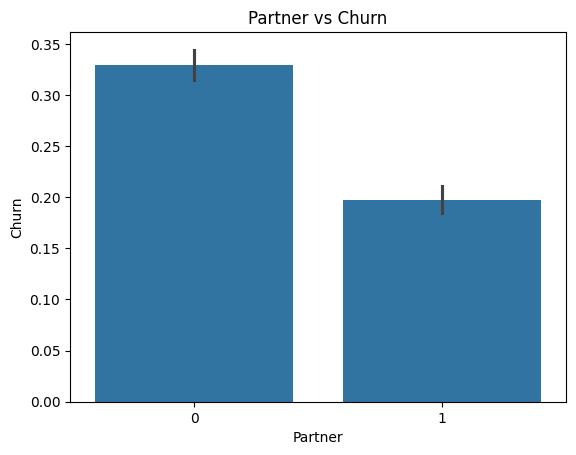

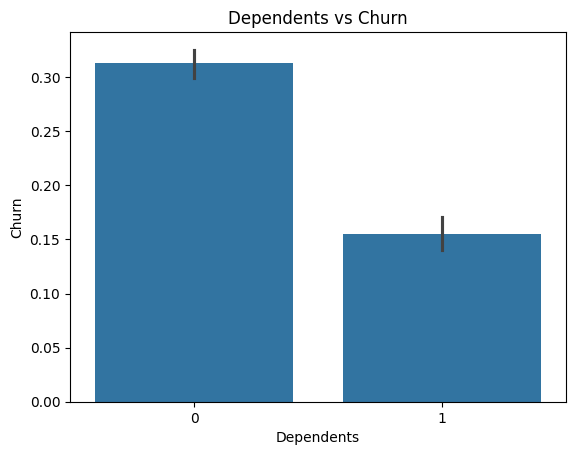

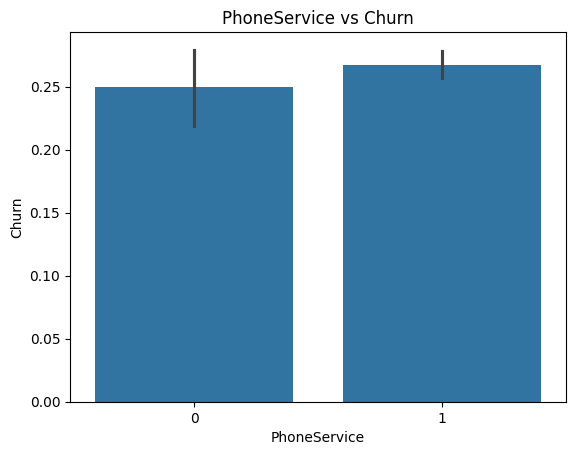

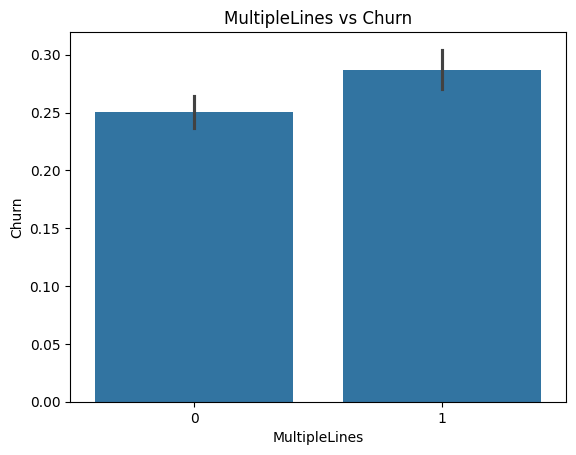

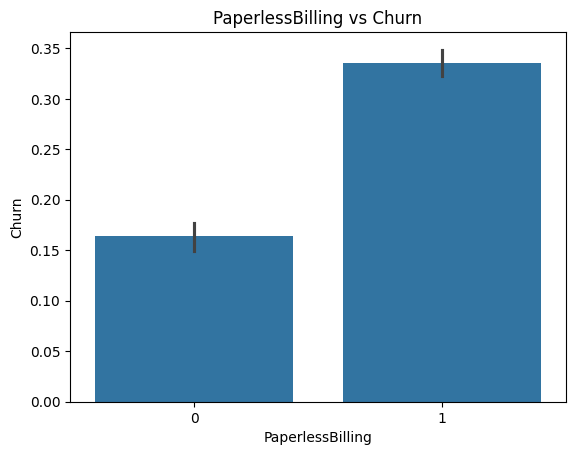

In [ ]:
binary_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'PaperlessBilling']
for bin in binary_cols:
  sns.barplot(x=df[bin], y=df['Churn'])
  plt.title(f"{bin} vs Churn")
  plt.show()

## Step 3: Correlation Analysis
- Identify relationships between numerical features


Text(0.5, 1.0, 'Correlation Heatmap')

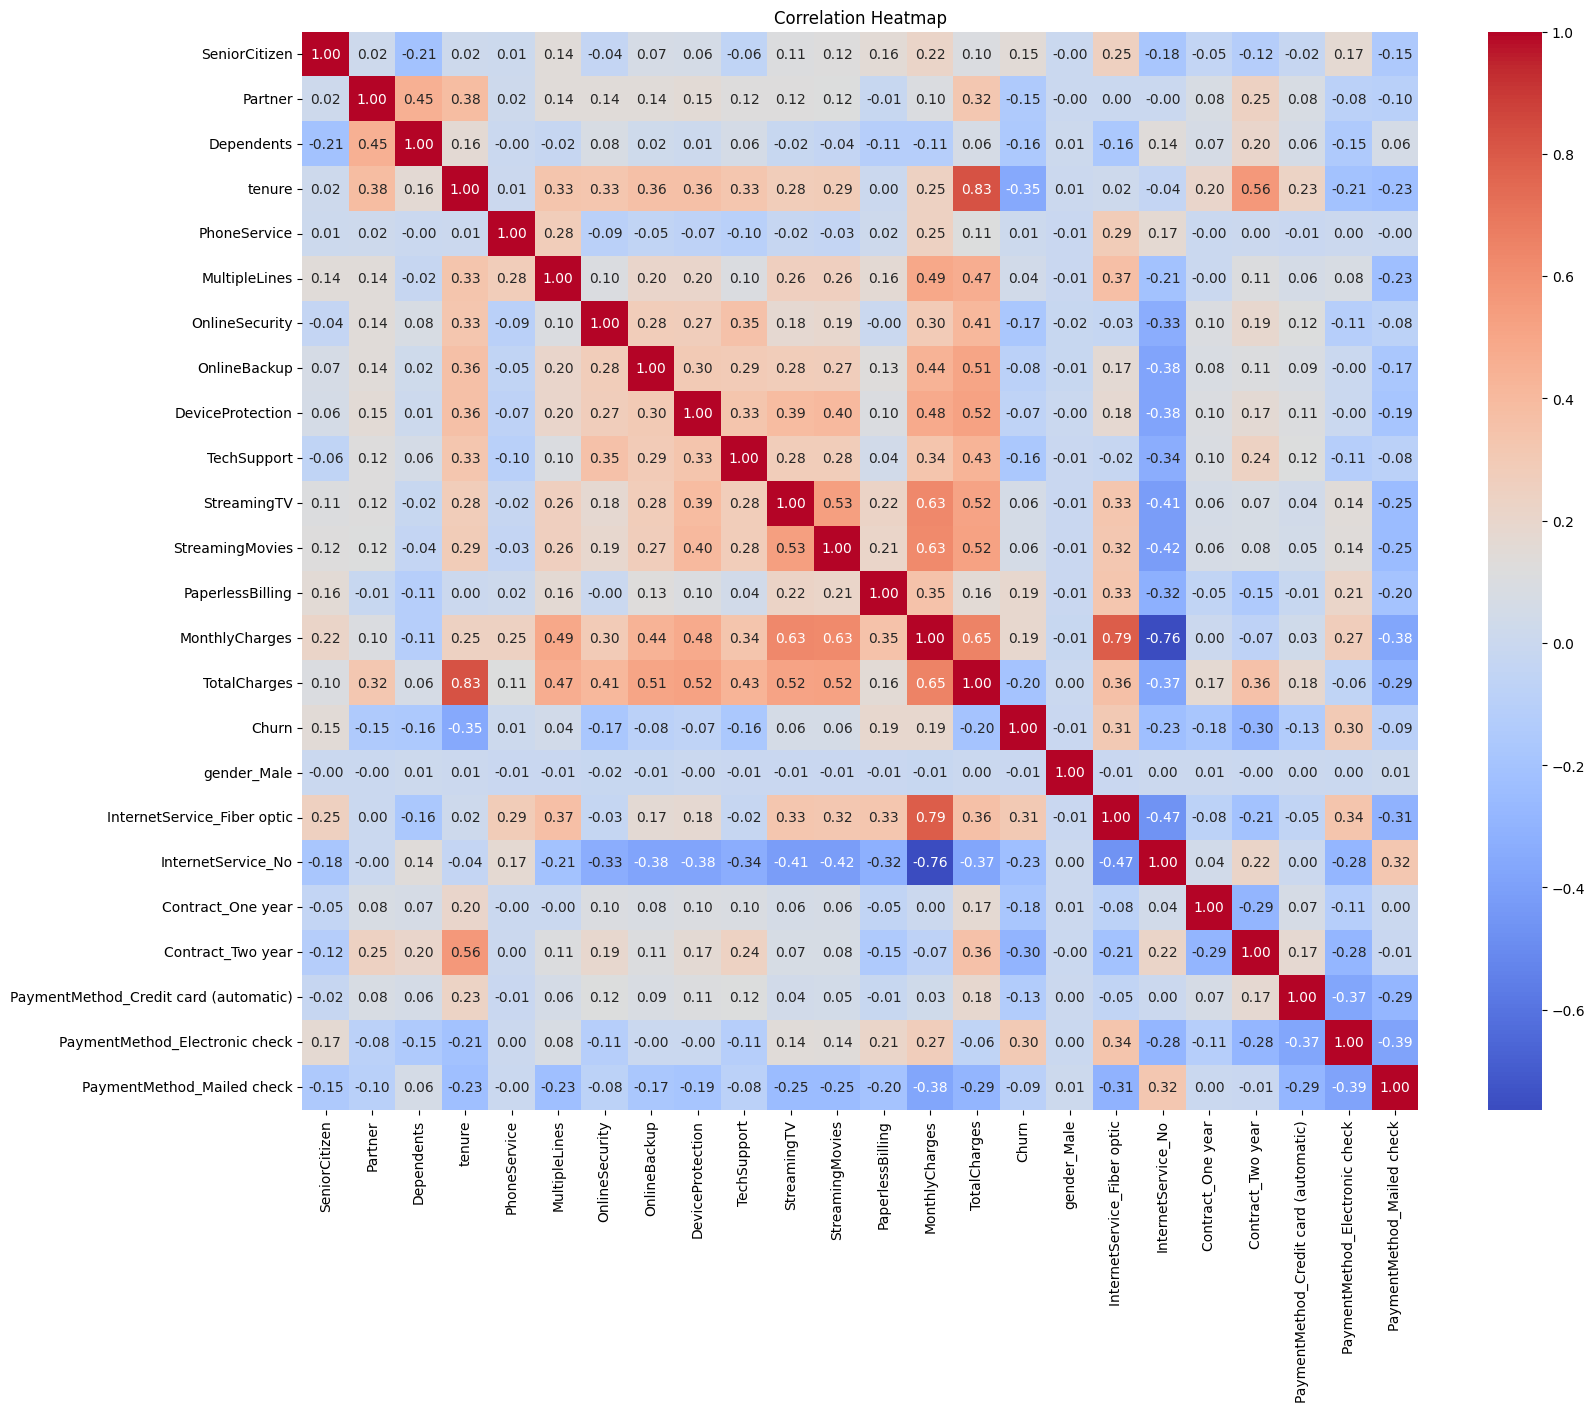

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')


| Rank | Feature                          | Correlation with Churn | Type                 | Interpretation                                                                                         |
| ---- | -------------------------------- | ---------------------- | -------------------- | ------------------------------------------------------------------------------------------------------ |
| 1️⃣  | `tenure`                         | **-0.35**              | Numeric              | Customers who have stayed longer are much **less likely** to churn.                                    |
| 2️⃣  | `Contract_Two year`              | **-0.30**              | Categorical (binary) | Customers with a 2-year contract are **significantly less likely** to churn.                           |
| 3️⃣  | `InternetService_Fiber optic`    | **+0.31**              | Categorical (binary) | Customers using fiber optic are **more likely** to churn — possibly due to pricing or service quality. |
| 4️⃣  | `PaymentMethod_Electronic check` | **+0.27**              | Categorical (binary) | Customers paying via electronic check are **more likely** to churn.                                    |
| 5️⃣  | `MonthlyCharges`                 | **+0.19**              | Numeric              | Higher monthly charges are associated with higher churn risk.                                          |


## Key Insights from EDA

- Churn rate is highest among customers with month-to-month contracts.  
- Customers who pay via Electronic Check churn more than others.  
- Customers without online security, tech support, and backup are more likely to churn.  
- Higher churn is seen in newer customers with low tenure and low total charges.  
- Long-term contracts and automatic payment methods reduce churn risk.  

## Recommendations

1. **Incentivize long-term contracts**: Offer discounts or benefits for moving away from month-to-month contracts.  
2. **Promote secure payment methods**: Encourage customers to use auto-pay or credit card instead of electronic checks.  
3. **Strengthen service bundles**: Provide discounted packages that include online security, tech support, and backup.  
4. **Focus on onboarding programs**: Target new customers with loyalty offers during their first 6 months.  
